# Graph coloring on real graphs

The graph coloring problem considered consists of finding the minimal number colors needed to color the nodes such that neighboring nodes never have the same color.

This example requires you to install _networks_ and _matplotlib_.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from cpmpy import *

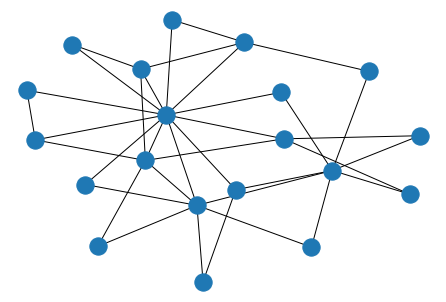

In [2]:
# get a graph, display it
#G = nx.petersen_graph() # does not display like in textbooks
G = nx.barabasi_albert_graph(20, 2)
nx.draw_kamada_kawai(G)

In [3]:
# takes a NetworkX graph as input
def model_graph_coloring(G):
    m = Model()
    
    max_colors = G.number_of_nodes()
    
    # dict of node-names to intvar
    nodecolor = dict()
    for node in G.nodes():
        nodecolor[node] = intvar(1, max_colors+1, name=str(node))
    
    # constrain adges to have differently colored nodes
    m += [nodecolor[node1] != nodecolor[node2] for node1, node2 in G.edges()]
    
    # minimize number of colors
    m.minimize(max(nodecolor.values()))
    
    return m, nodecolor

In [4]:
# solve the graph coloring problem
model, vardict = model_graph_coloring(G)

if not model.solve(time_limit=5):
    raise("No solution.")
    
print(f"Number of colors: {model.objective_value()} -- {model.status()}")

Number of colors: 3 -- ExitStatus.OPTIMAL (0.010973396 seconds)


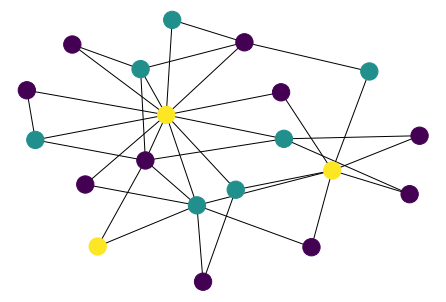

In [5]:
# and visualize it now with colors
color_map = [vardict[n].value()/model.objective_value() for n in G.nodes()]
nx.draw_kamada_kawai(G, node_color=color_map)